# Lesson 7: xarray for multidimensional data

In [1]:
import xarray as xr

In [2]:
xr.DataArray?

Init signature:
xr.DataArray(
    data: Any = <NA>,
    coords: Union[Sequence[Tuple], Mapping[Hashable, Any], NoneType] = None,
    dims: Union[Hashable, Sequence[Hashable], NoneType] = None,
    name: Hashable = None,
    attrs: Mapping = None,
    indexes: Dict[Hashable, pandas.core.indexes.base.Index] = None,
    fastpath: bool = False,
)
Docstring:     
N-dimensional array with labeled coordinates and dimensions.

DataArray provides a wrapper around numpy ndarrays that uses
labeled dimensions and coordinates to support metadata aware
operations. The API is similar to that for the pandas Series or
DataFrame, but DataArray objects can have any number of dimensions,
and their contents have fixed data types.

Additional features over raw numpy arrays:

- Apply operations over dimensions by name: ``x.sum('time')``.
- Select or assign values by integer location (like numpy):
  ``x[:10]`` or by label (like pandas): ``x.loc['2014-01-01']`` or
  ``x.sel(time='2014-01-01')``.
- Mathematical

In [10]:
import numpy as np

## Basic data type of xarray: DataArray

In [11]:
variable = np.array([1,2,3])
time = [0.1,0.2,0.3]

In [28]:
da = xr.DataArray(data=variable, dims={'time': time},attrs={'units': 'units of var'})

In [29]:
da.attrs['description'] = 'this is my first data array'

In [30]:
da

<xarray.DataArray (time: 3)>
array([1, 2, 3])
Dimensions without coordinates: time
Attributes:
    units:        units of var
    description:  this is my first data array

In [32]:
da2= da + 10

In [33]:
da.values

array([1, 2, 3])

In [34]:
da.attrs

{'units': 'units of var', 'description': 'this is my first data array'}

In [35]:
type(da)

xarray.core.dataarray.DataArray

## Dataset: the most important "method" of xarray

In [36]:
xr.Dataset?

Init signature: xr.Dataset(*args, **kwds)
Docstring:     
A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file,
and consists of variables, coordinates and attributes which
together form a self describing dataset.

Dataset implements the mapping interface with keys given by variable
names and values given by DataArray objects for each variable name.

One dimensional variables with name equal to their dimension are
index coordinates used for label based indexing.

To load data from a file or file-like object, use the `open_dataset`
function.

Parameters
----------
data_vars : dict-like, optional
    A mapping from variable names to :py:class:`~xarray.DataArray`
    objects, :py:class:`~xarray.Variable` objects or to tuples of
    the form ``(dims, data[, attrs])`` which can be used as
    arguments to create a new ``Variable``. Each dimension must
    have the same length in all variables in which it appears.

    The following

In [39]:
temperature = 20*np.random.rand(10)

In [40]:
temperature

array([ 4.59619618,  9.13092324,  5.26622312, 16.39934435,  1.4329394 ,
       17.95223565, 18.42754493,  4.80192204, 10.70463151,  9.71121302])

In [42]:
precipitation = 30*np.random.rand(10)

In [43]:
precipitation

array([ 0.26051096,  8.78975838,  2.63003083, 15.28971085, 13.92688868,
        0.40010077, 10.74476015, 12.97233516, 14.89526464, 20.56458157])

In [54]:
coordinates = {
    'time': np.arange(10),
}

variables = {
    'temp': ('time',temperature),
    'precip': ('time',precipitation),
}

In [55]:
ds = xr.Dataset(variables,coords=coordinates)

In [51]:
ds

<xarray.Dataset>
Dimensions:  (time: 10)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    temp     (time) float64 4.596 9.131 5.266 16.4 ... 18.43 4.802 10.7 9.711
    precip   (time) float64 0.2605 8.79 2.63 15.29 ... 10.74 12.97 14.9 20.56

In [52]:
type(ds)

xarray.core.dataset.Dataset

In [53]:
ds['temp']

<xarray.DataArray 'temp' (time: 10)>
array([ 4.59619618,  9.13092324,  5.26622312, 16.39934435,  1.4329394 ,
       17.95223565, 18.42754493,  4.80192204, 10.70463151,  9.71121302])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

### Higher-dimension datasets

In [74]:
N = 100
M = 1000

temp = 20*np.random.rand(M,N,N)
precip = 30*np.random.rand(M,N,N)

In [75]:
temp.shape, precip.shape

((1000, 100, 100), (1000, 100, 100))

In [76]:
longitude = np.linspace(0,180,N)
latitude = np.linspace(0,90,N)
time = np.arange(M)

In [64]:
longitude.shape, latitude.shape

((100,), (100,))

In [84]:
coordinates = {
    'time': time,
    'longitude': longitude,
    'latitude': latitude,
}

variables = {
    'temperature': (('time','longitude','latitude'),temp),
    'precipitation': (('time','longitude','latitude'),precip),
}

In [85]:
da = xr.Dataset(variables,coords=coordinates)

In [86]:
da

<xarray.Dataset>
Dimensions:        (latitude: 100, longitude: 100, time: 1000)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 13.46 0.4558 ... 15.74
    precipitation  (time, longitude, latitude) float64 7.896 6.004 ... 29.65

In [88]:
da.temperature.attrs['units'] = 'degrees Celsius'
da.temperature.attrs['long_name'] = 'Atmospheric temperature at sea level'

In [89]:
da

<xarray.Dataset>
Dimensions:        (latitude: 100, longitude: 100, time: 1000)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 13.46 0.4558 ... 15.74
    precipitation  (time, longitude, latitude) float64 7.896 6.004 ... 29.65

In [90]:
da

<xarray.Dataset>
Dimensions:        (latitude: 100, longitude: 100, time: 1000)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 13.46 0.4558 ... 15.74
    precipitation  (time, longitude, latitude) float64 7.896 6.004 ... 29.65

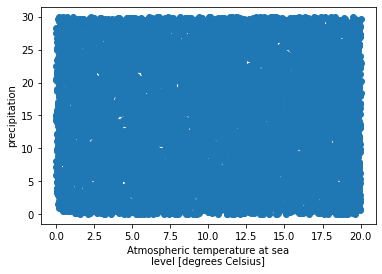

In [91]:
da.sel(time=899).plot.scatter(x='temperature',y='precipitation')

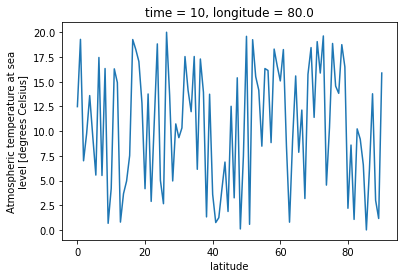

In [99]:
da.sel(longitude=80.,time=10).temperature.plot()

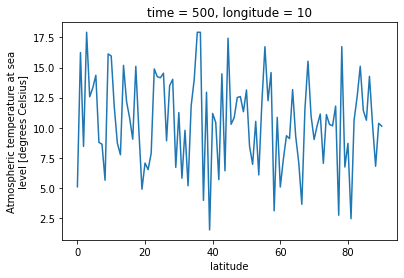

In [103]:
da.interp(longitude=10).sel(time=500).temperature.plot()

In [104]:
da.interp(longitude=np.array([6,10,21,87]))

<xarray.Dataset>
Dimensions:        (latitude: 100, longitude: 4, time: 1000)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
  * longitude      (longitude) int64 6 10 21 87
Data variables:
    temperature    (time, longitude, latitude) float64 18.82 9.093 ... 9.797
    precipitation  (time, longitude, latitude) float64 21.7 5.554 ... 4.728

# Loading a netCDF file hosted online

In [108]:
url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/MODIS_Aqua/MODIS_Aqua_20211012T012459Z.nc'

In [109]:
chla = xr.open_dataset(url)

In [110]:
chla

<xarray.Dataset>
Dimensions:      (lat: 120, lon: 240, time: 1)
Coordinates:
  * time         (time) float32 1.634e+09
  * lon          (lon) float32 -130.0 -129.9 -129.9 ... -120.1 -120.1 -120.0
  * lat          (lat) float32 38.98 38.94 38.9 38.85 ... 34.15 34.1 34.06 34.02
Data variables:
    chlorophyll  (time, lat, lon) float32 ...
Attributes:
    product_name:                      A2021284.L3m_DAY_CHL_chl_ocx_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.1QLP
    date_created:                      2021-10-12T04:41:59.000Z
    history:                           l3mapgen par=A2021284.L3m_DAY_CHL_chl_...
    l2_flag_names:                     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,...
    time_coverage_start:               2021-10-11T00:25:01.000Z
    time_coverage_end:                 2021-10-12T01:24:59.000Z
    start_orbit_number:                103432
    end_orbit_number:                  103447
    map_projection:                    Equidistant Cylindrical
    latitude_units:                    degrees_north
    longitude_units:                   degrees_east
    northernmost_latitude:             90.0
    southernmost_latitude:             -90.0
    westernmost_longitude:             -180.0
    easternmost_longitude:             180.0
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    latitude_step:                     0.041666668
    longitude_step:                    0.041666668
    sw_point_latitude:                 -89.979164
    sw_point_longitude:                -179.97917
    spatialResolution:                 4.64 km
    geospatial_lon_resolution:         0.041666668
    geospatial_lat_resolution:         0.041666668
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    number_of_lines:                   4320
    number_of_columns:                 8640
    measure:                           Mean
    suggested_image_scaling_minimum:   0.01
    suggested_image_scaling_maximum:   20.0
    suggested_image_scaling_type:      LOG
    suggested_image_scaling_applied:   No
    _lastModified:                     2021-10-12T04:41:59.000Z
    Conventions:                       CF-1.6 ACDD-1.3
    institution:                       NASA Goddard Space Flight Center, Ocea...
    standard_name_vocabulary:          CF Standard Name Table v36
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                A2021284.L3b_DAY_CHL.nc/L3/A2021284.L3...
    license:                           https://science.nasa.gov/earth-science...
    creator_name:                      NASA/GSFC/OBPG
    publisher_name:                    NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Mapped
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2018
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         Attribute edlided: Unsupported attribu...
    data_minimum:                      0.0009999999
    data_maximum:                      99.47729

In [123]:
import matplotlib.colors as colors
import cmocean as cmo
import matplotlib.pyplot as plt

(36.0, 38.0)

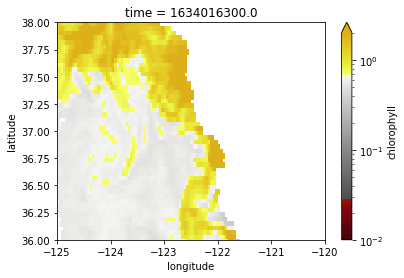

In [124]:
chla.isel(time=0).chlorophyll.plot.pcolormesh(norm=colors.LogNorm(vmin=0.01,vmax=2),
                                              cmap=cmo.cm.oxy)

plt.xlim(-125,-120)
plt.ylim(36,38)

In [127]:
chla.interp(lon=-125.5,lat=37.5)

<xarray.Dataset>
Dimensions:      (time: 1)
Coordinates:
  * time         (time) float32 1.634e+09
    lon          float64 -125.5
    lat          float64 37.5
Data variables:
    chlorophyll  (time) float64 0.6695
Attributes:
    product_name:                      A2021284.L3m_DAY_CHL_chl_ocx_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.1QLP
    date_created:                      2021-10-12T04:41:59.000Z
    history:                           l3mapgen par=A2021284.L3m_DAY_CHL_chl_...
    l2_flag_names:                     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,...
    time_coverage_start:               2021-10-11T00:25:01.000Z
    time_coverage_end:                 2021-10-12T01:24:59.000Z
    start_orbit_number:                103432
    end_orbit_number:                  103447
    map_projection:                    Equidistant Cylindrical
    latitude_units:                    degrees_north
    longitude_units:                   degrees_east
    northernmost_latitude:             90.0
    southernmost_latitude:             -90.0
    westernmost_longitude:             -180.0
    easternmost_longitude:             180.0
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    latitude_step:                     0.041666668
    longitude_step:                    0.041666668
    sw_point_latitude:                 -89.979164
    sw_point_longitude:                -179.97917
    spatialResolution:                 4.64 km
    geospatial_lon_resolution:         0.041666668
    geospatial_lat_resolution:         0.041666668
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    number_of_lines:                   4320
    number_of_columns:                 8640
    measure:                           Mean
    suggested_image_scaling_minimum:   0.01
    suggested_image_scaling_maximum:   20.0
    suggested_image_scaling_type:      LOG
    suggested_image_scaling_applied:   No
    _lastModified:                     2021-10-12T04:41:59.000Z
    Conventions:                       CF-1.6 ACDD-1.3
    institution:                       NASA Goddard Space Flight Center, Ocea...
    standard_name_vocabulary:          CF Standard Name Table v36
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                A2021284.L3b_DAY_CHL.nc/L3/A2021284.L3...
    license:                           https://science.nasa.gov/earth-science...
    creator_name:                      NASA/GSFC/OBPG
    publisher_name:                    NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Mapped
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2018
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         Attribute edlided: Unsupported attribu...
    data_minimum:                      0.0009999999
    data_maximum:                      99.47729

In [128]:
chla = chla.isel(time=0)

In [132]:
chla.lon

<xarray.DataArray 'lon' (lon: 240)>
array([-129.97917 , -129.9375  , -129.89583 , ..., -120.104164, -120.0625  ,
       -120.02083 ], dtype=float32)
Coordinates:
    time     float32 1.634e+09
  * lon      (lon) float32 -130.0 -129.9 -129.9 -129.9 ... -120.1 -120.1 -120.0
Attributes:
    long_name:  longitude

/Users/crocha/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


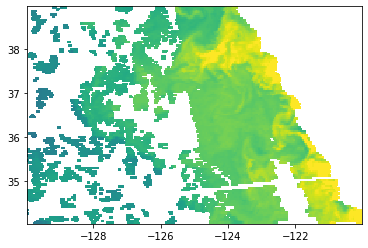

In [137]:
plt.pcolormesh(chla.lon,chla.lat,chla.chlorophyll,
               norm=colors.LogNorm(vmin=0.01,vmax=2))

In [138]:
chla.lon

<xarray.DataArray 'lon' (lon: 240)>
array([-129.97917 , -129.9375  , -129.89583 , ..., -120.104164, -120.0625  ,
       -120.02083 ], dtype=float32)
Coordinates:
    time     float32 1.634e+09
  * lon      (lon) float32 -130.0 -129.9 -129.9 -129.9 ... -120.1 -120.1 -120.0
Attributes:
    long_name:  longitude

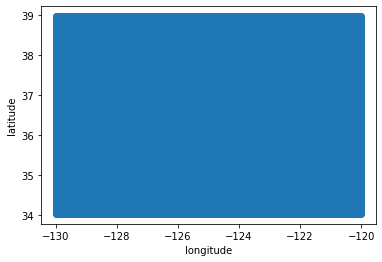

In [146]:
chla.plot.scatter(x='lon',y='lat')

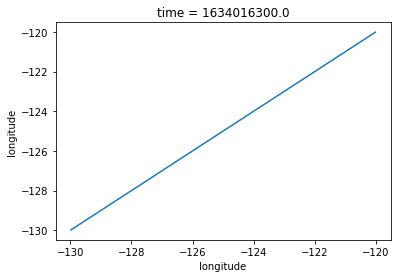

In [140]:
chla['lon'].plot()